# Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define the XOR Data Set

In [2]:

X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])

y = np.array([[0],
              [1],
              [1],
              [0]
             ])

# Define Functions

In [3]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [4]:
def feedforward(X):
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)
    return(a_o,a_h)

# Define Parameters

In [5]:
# Learning Rate
eta = 3

# Number of epochs for learning
epochs = 300

# Number of Hidden Neurons
hidden = 5

# Initialize the weights

In [6]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

w01_list = []
w12_list = []

## Start feeding forward and backpropagate *epochs* times.

In [7]:
E_o = []
for epoch in range(epochs):
    a_o, a_h = feedforward(X)
    
    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
    print("******** Error after ", epoch, "epochs is ", sum(a_o_error), "*********")
    #print(sum(a_o_error))
    E_o = np.append(E_o, sum(a_o_error))
    
    
    # Backpropagation
    ## Output to Hidden Layer weights
    delta_E_o = a_o - y
    delta_a_o = sigmoid(a_o,derivative=True)
    delta_z_o = a_h
    delta_E_w12 = np.dot(delta_z_o.T,(delta_E_o * delta_a_o))
    

    ## Hidden to Input Layer weights
    delta_E_h = np.dot(delta_E_o * delta_a_o, w12.T)
    delta_a_h = sigmoid(a_h,derivative=True)
    delta_z_h = X
    delta_E_w01 = np.dot(delta_z_h.T, delta_E_h * delta_a_h)
    

    # Store All weights throughout learning
    w01_list.append(w01)
    w12_list.append(w12)

    # Adjust weights
    w01 = w01 - eta * delta_E_w01
    w12 = w12 - eta * delta_E_w12
    


******** Error after  0 epochs is  [0.79821657] *********
******** Error after  1 epochs is  [0.59069037] *********
******** Error after  2 epochs is  [0.51984675] *********
******** Error after  3 epochs is  [0.51308781] *********
******** Error after  4 epochs is  [0.50883481] *********
******** Error after  5 epochs is  [0.50644731] *********
******** Error after  6 epochs is  [0.50469034] *********
******** Error after  7 epochs is  [0.50355048] *********
******** Error after  8 epochs is  [0.50266675] *********
******** Error after  9 epochs is  [0.50204296] *********
******** Error after  10 epochs is  [0.50154324] *********
******** Error after  11 epochs is  [0.50116585] *********
******** Error after  12 epochs is  [0.50085332] *********
******** Error after  13 epochs is  [0.50060196] *********
******** Error after  14 epochs is  [0.50038568] *********
******** Error after  15 epochs is  [0.50020104] *********
******** Error after  16 epochs is  [0.50003557] *********
*******

******** Error after  191 epochs is  [0.03034796] *********
******** Error after  192 epochs is  [0.02968638] *********
******** Error after  193 epochs is  [0.02904723] *********
******** Error after  194 epochs is  [0.02842954] *********
******** Error after  195 epochs is  [0.02783241] *********
******** Error after  196 epochs is  [0.02725496] *********
******** Error after  197 epochs is  [0.02669637] *********
******** Error after  198 epochs is  [0.02615585] *********
******** Error after  199 epochs is  [0.02563266] *********
******** Error after  200 epochs is  [0.02512608] *********
******** Error after  201 epochs is  [0.02463543] *********
******** Error after  202 epochs is  [0.02416007] *********
******** Error after  203 epochs is  [0.02369939] *********
******** Error after  204 epochs is  [0.02325279] *********
******** Error after  205 epochs is  [0.02281972] *********
******** Error after  206 epochs is  [0.02239964] *********
******** Error after  207 epochs is  [0.

# Checking dimensions across calculations

In [8]:
    print("")
    print("E_o dimension is ", delta_E_o.shape)
    print("delta_a_o dimension is ", delta_a_o.shape)
    print("delta_z_o dimension is ", delta_z_o.shape)
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("delta_z_o Transpose dimension is", (delta_z_o.T).shape)
    print("Output layer dimension is ", delta_E_w12.shape)
    print("")
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("w12 Transpose dimension is", (w12.T).shape)    
    print("delta_E_h dimension is ", delta_E_h.shape)
    print("delta_a_h dimension is ", delta_a_h.shape)
    print("delta_z_h dimension is ", delta_z_h.shape)
    print("Hidden Layer dimension is ", delta_E_w01.shape)


E_o dimension is  (4, 1)
delta_a_o dimension is  (4, 1)
delta_z_o dimension is  (4, 5)
delta_E_o times delta_a_o dimension is  (4, 1)
delta_z_o Transpose dimension is (5, 4)
Output layer dimension is  (5, 1)

delta_E_o times delta_a_o dimension is  (4, 1)
w12 Transpose dimension is (1, 5)
delta_E_h dimension is  (4, 5)
delta_a_h dimension is  (4, 5)
delta_z_h dimension is  (4, 3)
Hidden Layer dimension is  (3, 5)


# Sample learned output

In [9]:
a_o, a_h = feedforward(X)
print(a_o)

[[0.06924601]
 [0.94299169]
 [0.93380576]
 [0.04389273]]


In [10]:
#w01_list[0][0][0]
len(w01)
#len(w01.columns)
print(w01.shape[0])
print(w01.shape[1])
print(len(w01_list))
w01_list[0]


3
5
300


array([[0.75634691, 0.9556234 , 0.70224738, 0.89781142, 0.13838488],
       [0.64419549, 0.32222208, 0.22558193, 0.59604421, 0.39798663],
       [0.81067087, 0.0542989 , 0.13923502, 0.64167314, 0.64505976]])

In [11]:
len(w12)
#len(w12.columns)
print(w12.shape[0])
print(w12.shape[1])
print(len(w12_list))
w12_curve=[]

for j in range(w12.shape[0]):
    for x in range(len(w12_list)):
        w12_curve.append(w12_list[x][j])

5
1
300


# Neural Network weights: stored and plotted

In [12]:
w01_curve = []
for i in range(w01.shape[0]):
    for j in range(w01.shape[1]):
        for x in range(len(w01_list)):
            #print(w01_list[x][i][j])
            w01_curve.append(w01_list[x][i][j])
            #print("Weights w[",x,"],[",i,"],[",j,"] stored")

In [13]:
len(w01_curve)
w01_curve
#w01_curve
numberOfWeights = w01.shape[1]*w01.shape[0]
numberOfWeights
#w01_curve[0:w01.shape[0]]
#w01_curve[0:epochs]

15

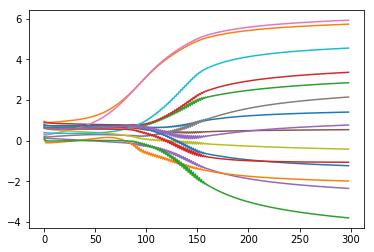

In [14]:
for k in range(numberOfWeights):
    t= w01_curve[(epochs*k):(epochs*(k+1)-1)]
    plt.plot(t)


# Plot Error

Minimum Error achieved after 300 iterations with 5 hidden neurons and 3 Learning Rate is: 0.007235610764258698


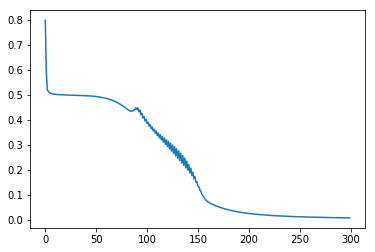

In [15]:

print("Minimum Error achieved after", epochs, "iterations with", hidden, "hidden neurons and", eta, "Learning Rate is:",min(E_o))
   
plt.plot(E_o)
#plt.axis([0, epochs, 0, 100])
plt.show()

# Sample Learned Output

In [16]:
a_o, a_h = feedforward(X)
print(a_o)

[[0.06924601]
 [0.94299169]
 [0.93380576]
 [0.04389273]]
